# Housing Price Predictions with Melbourne

### Imports

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set (rc = {'figure.figsize': (20,8)})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

### Gathering Data

In [103]:
data = pd.read_csv("/content/Melbourne_housing_FULL.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### EDA

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [105]:
data.size

731997

In [106]:
data.shape

(34857, 21)

In [107]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [108]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [109]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

### Convert from object to categorical values

In [110]:
obj_cols = data.select_dtypes("object").columns

In [111]:
# "CAR" and "BATHROOM" include float64 values but also categorical values
# So I add to obj_cols array these columns
obj_cols = np.append(obj_cols,"Car")
obj_cols = np.append(obj_cols,"Bathroom")
obj_cols

array(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date',
       'CouncilArea', 'Regionname', 'Car', 'Bathroom'], dtype=object)

In [112]:
# now, I convert to categorical values
for cname in obj_cols:
    data[cname] = data[cname].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  category
 12  Car            26129 non-null  category
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

### Removing Duplicate Datas

In [113]:
# I wanto check if dataset has duplicate datas
dd = data.duplicated()

In [114]:
print(f"Sum of duplicate data : ", dd.sum())

Sum of duplicate data :  1


In [115]:
# I found only one record.
data[dd]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [116]:
# Now, I drop its
data.drop_duplicates(inplace=True, keep="first")
data.duplicated().sum()

0

### Outliers

In [117]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.031013e+00,0.969947,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34855.0,1.118481e+01,6.788952,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34855.0,3.116062e+03,109.025437,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26639.0,3.084650e+00,0.980708,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Landsize,23046.0,5.936072e+02,3398.915462,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13741.0,1.602516e+02,401.281270,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15550.0,1.965288e+03,37.328340,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26880.0,-3.781063e+01,0.090281,-38.19043,-37.86295,-37.8076,-3.775409e+01,-3.739020e+01
Longtitude,26880.0,1.450018e+02,0.120167,144.42379,144.93350,145.0078,1.450719e+02,1.455264e+02


In [118]:
# "Landsize" and "BuildArea" can not be zero so I converted them to nan
data.loc[data['Landsize'] <= 0, "Landsize"] = np.nan
data.loc[data['BuildingArea'] <= 0, "BuildingArea"] = np.nan

In [119]:
# Wikipedia writes that Melbourne was founded in 1835. On the other hands, min value of the "YearBuilt" feature is 1196.
# So I decided that I will remove values smaller than 1835 years.
# Source : https://tr.wikipedia.org/wiki/Melbourne

data.drop(data.loc[data['YearBuilt'] < 1835].index, inplace=True)

In [120]:
# I will new feauture that is called "houseAge" and I remove YearBuilt feature.
T_year = (dt.datetime.now()).year
data['houseAge'] = T_year - data['YearBuilt']
data.drop(data.loc[data["houseAge"]<0].index, inplace=True)
data = data.drop(['YearBuilt'], axis = 1)

In [121]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,houseAge
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,123.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,123.0


In [122]:
from typing import Counter
# Z-Score
num_cols = data.select_dtypes("float64", "int64").columns

for column in num_cols:
  max_value = (3*data[column].std()) + data[column].mean()
  min_value = -((3*data[column].std()) + data[column].mean())
  mean = data.loc[(data[column] > min_value) & (data[column] < max_value), column].mean()
  if mean is not np.nan:
    data.loc[(data[column] < min_value) | (data[column] > max_value), column] = mean
    data[column].fillna(mean, inplace=True)
  else:
    data[column].fillna(data[column].mean(), inplace=True)

In [123]:
data.shape

(34851, 21)

### Missing Values

In [124]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom         8226
Car              8727
Landsize            0
BuildingArea        0
CouncilArea         3
Lattitude           0
Longtitude          0
Regionname          3
Propertycount       0
houseAge            0
dtype: int64

In [125]:
# I found percentage of missing values
data.isnull().sum()/len(data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom         23.603340
Car              25.040888
Landsize          0.000000
BuildingArea      0.000000
CouncilArea       0.008608
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.008608
Propertycount     0.000000
houseAge          0.000000
dtype: float64

In [126]:
cat_cols = data.select_dtypes("category")
cat_cols.head()

,Suburb,Address,Type,Method,SellerG,Date,Bathroom,Car,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,1.0,1.0,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,1.0,1.0,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,1.0,0.0,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,2.0,1.0,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,2.0,0.0,Yarra City Council,Northern Metropolitan


In [127]:
for column in cat_cols:
  data[column] = data[column].fillna(data[column].mode().iloc[0])

In [128]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
houseAge         0
dtype: int64

### Data Visualization

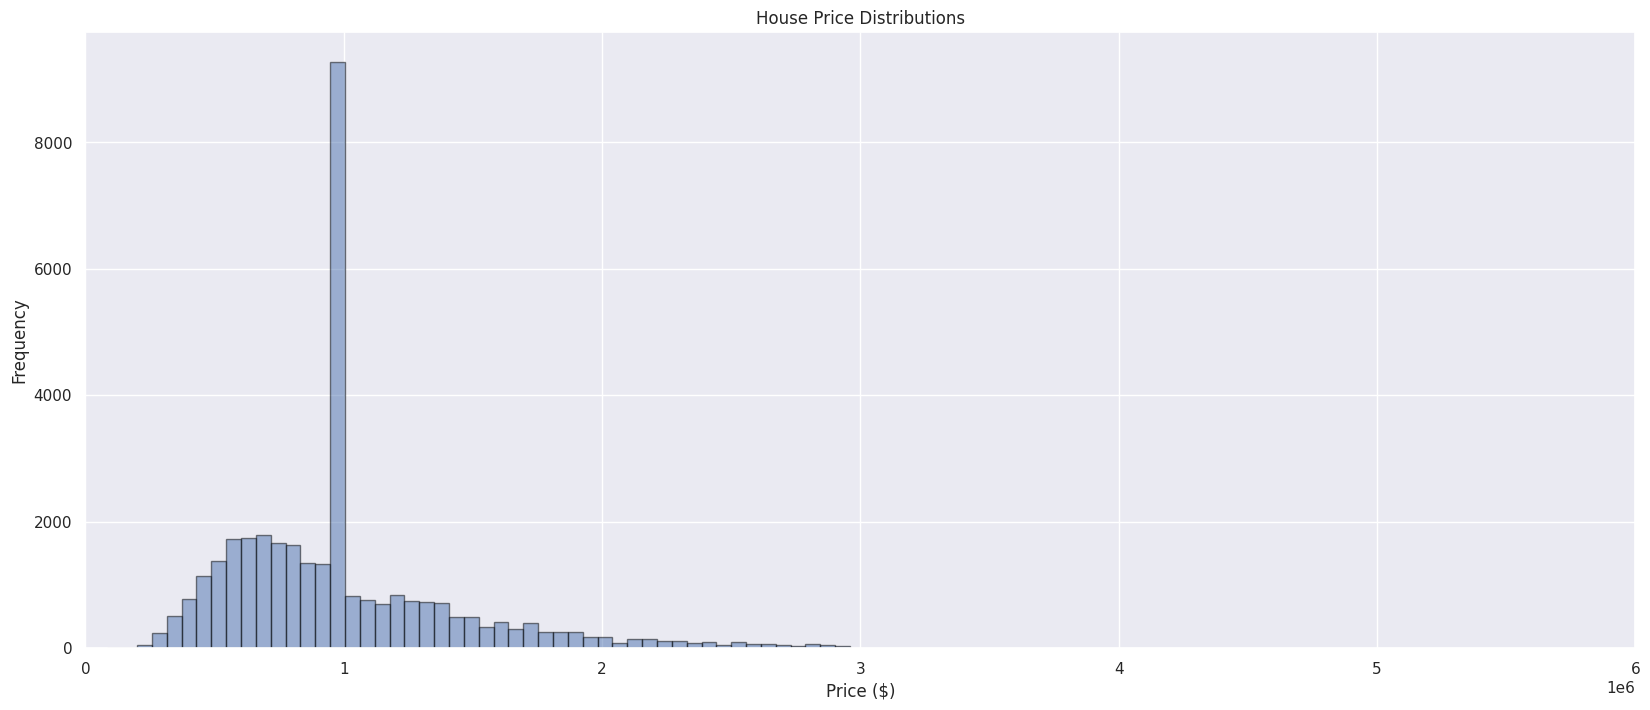

In [129]:
# Price Distribution
num_bins = 50
n, bins, patches = plt.hist(data.Price, num_bins, color='b', alpha=0.5, histtype = 'bar', ec = 'black')
plt.ylabel ('Frequency')
plt.xlabel ('Price ($)')
plt.xlim([0, 6000000])

plt.title ('House Price Distributions')
plt.show()

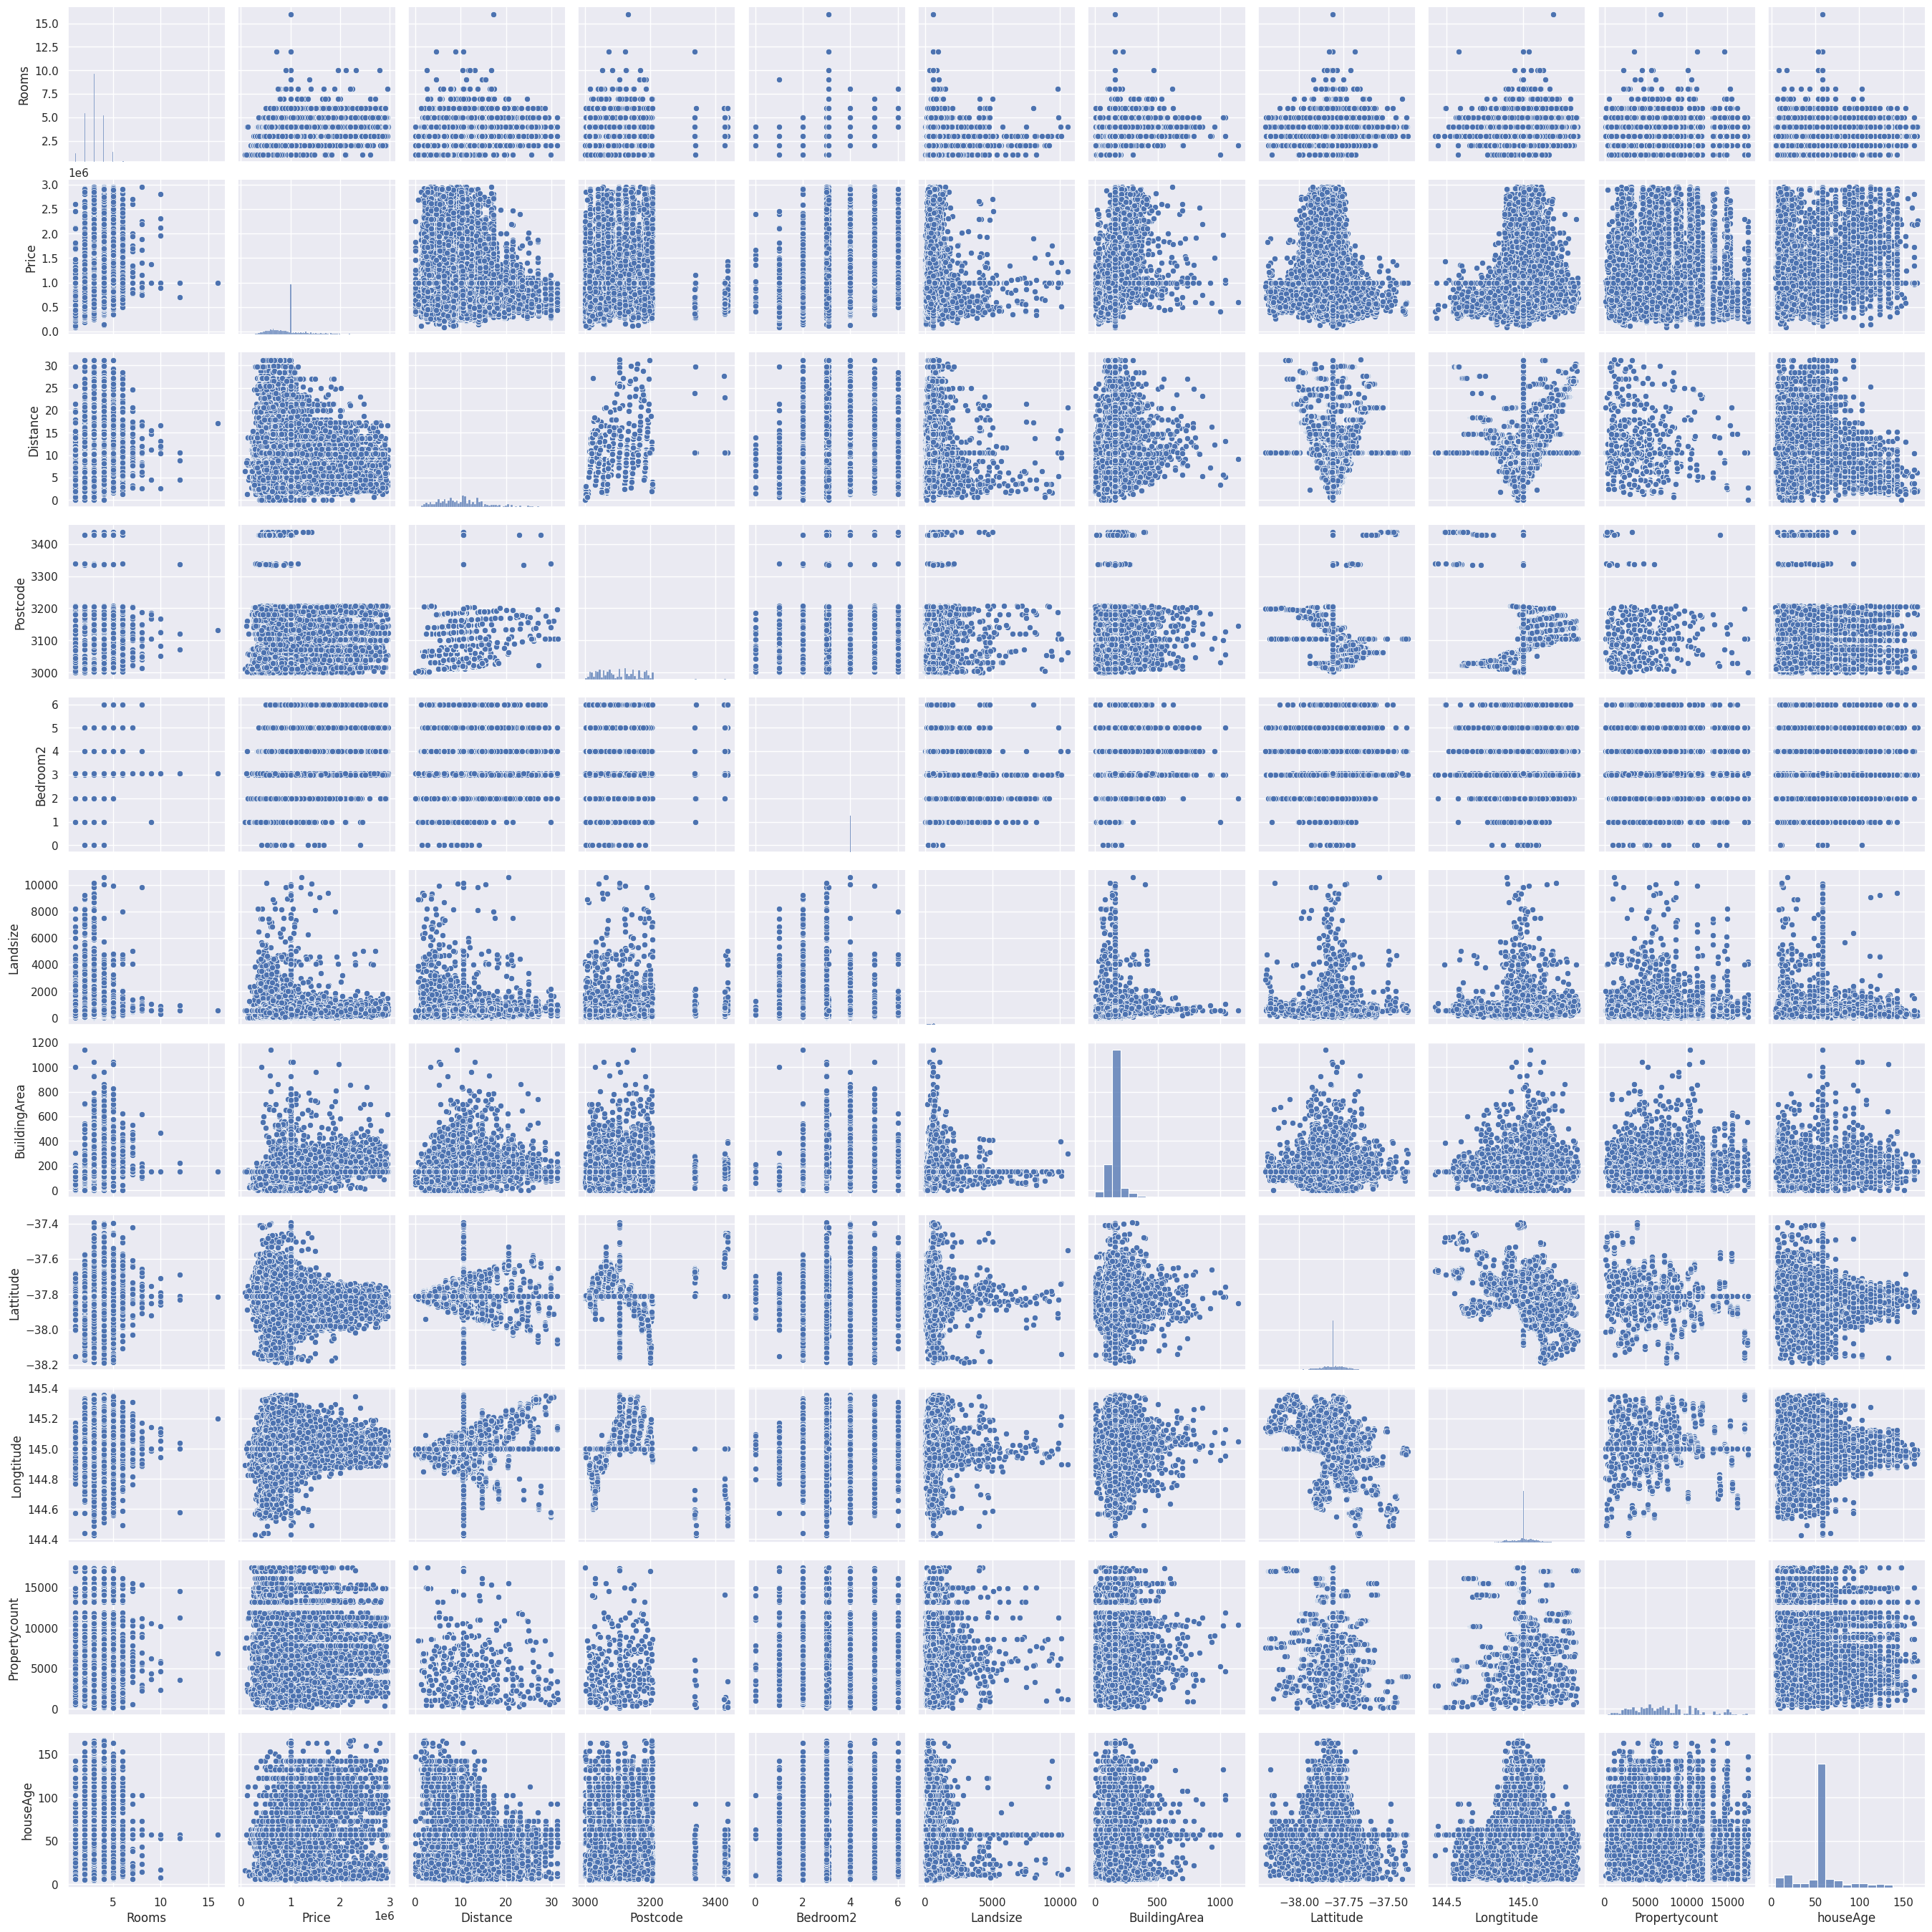

In [130]:
sns.pairplot(data)

<ipython-input-131-d032aa9d56e0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True)


Text(0.5, 1.0, 'Correlation Matrix')

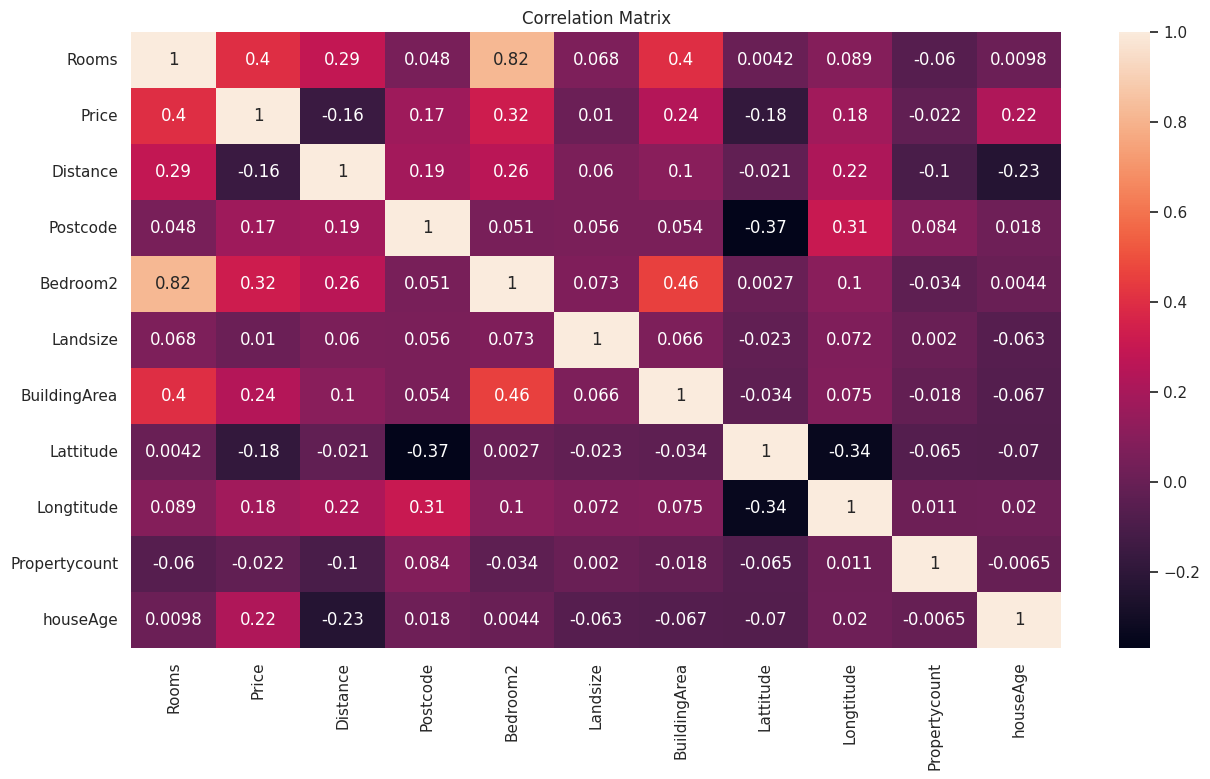

In [131]:
# Correlation Matrix
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot= True)
plt.title('Correlation Matrix')

In [132]:
data = data.drop(['Address', 'SellerG','Date'], axis = 1)

In [133]:
cpy_cat = data.select_dtypes(include=['category']).copy()
cpy_cat.head()

,Suburb,Type,Method,Bathroom,Car,CouncilArea,Regionname
0,Abbotsford,h,SS,1.0,1.0,Yarra City Council,Northern Metropolitan
1,Abbotsford,h,S,1.0,1.0,Yarra City Council,Northern Metropolitan
2,Abbotsford,h,S,1.0,0.0,Yarra City Council,Northern Metropolitan
3,Abbotsford,u,VB,2.0,1.0,Yarra City Council,Northern Metropolitan
4,Abbotsford,h,SP,2.0,0.0,Yarra City Council,Northern Metropolitan


### Label Encoder

#### One-Hot Encoder

In [134]:
data_encoded = pd.get_dummies(data = cpy_cat, drop_first= True)
data_encoded.head()

,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [135]:
data.drop(['Type','Method','CouncilArea','Regionname','Suburb'], axis = 1, inplace = True)
data.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,houseAge
0,2,1.000282e+06,2.5,3067.0,2.0,1.0,1.0,126.000000,155.690093,-37.8014,144.9958,4019.0,57.592097
1,2,1.480000e+06,2.5,3067.0,2.0,1.0,1.0,202.000000,155.690093,-37.7996,144.9984,4019.0,57.592097
2,2,1.035000e+06,2.5,3067.0,2.0,1.0,0.0,156.000000,79.000000,-37.8079,144.9934,4019.0,123.000000
3,3,1.000282e+06,2.5,3067.0,3.0,2.0,1.0,577.745745,155.690093,-37.8114,145.0116,4019.0,57.592097
4,3,1.465000e+06,2.5,3067.0,3.0,2.0,0.0,134.000000,150.000000,-37.8093,144.9944,4019.0,123.000000


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34851 entries, 0 to 34856
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Rooms          34851 non-null  int64   
 1   Price          34851 non-null  float64 
 2   Distance       34851 non-null  float64 
 3   Postcode       34851 non-null  float64 
 4   Bedroom2       34851 non-null  float64 
 5   Bathroom       34851 non-null  category
 6   Car            34851 non-null  category
 7   Landsize       34851 non-null  float64 
 8   BuildingArea   34851 non-null  float64 
 9   Lattitude      34851 non-null  float64 
 10  Longtitude     34851 non-null  float64 
 11  Propertycount  34851 non-null  float64 
 12  houseAge       34851 non-null  float64 
dtypes: category(2), float64(10), int64(1)
memory usage: 3.3 MB


### Training Model

In [137]:
X = data.loc[:, data.columns != 'Price']
X.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,houseAge
0,2,2.5,3067.0,2.0,1.0,1.0,126.000000,155.690093,-37.8014,144.9958,4019.0,57.592097
1,2,2.5,3067.0,2.0,1.0,1.0,202.000000,155.690093,-37.7996,144.9984,4019.0,57.592097
2,2,2.5,3067.0,2.0,1.0,0.0,156.000000,79.000000,-37.8079,144.9934,4019.0,123.000000
3,3,2.5,3067.0,3.0,2.0,1.0,577.745745,155.690093,-37.8114,145.0116,4019.0,57.592097
4,3,2.5,3067.0,3.0,2.0,0.0,134.000000,150.000000,-37.8093,144.9944,4019.0,123.000000


In [138]:
y = data['Price']
y.head()

0    1.000282e+06
1    1.480000e+06
2    1.035000e+06
3    1.000282e+06
4    1.465000e+06
Name: Price, dtype: float64

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [140]:
# Models
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
    }
}

In [141]:
# Attributes
for model in models:
    models[model]['prediction'] = None
    models[model]['errors'] = {
        'mae': None,
        'mse': None,
        'rmse': None
    }
    models[model]['scores'] = {
        'r2': None
    }

In [142]:
for model in models:
    print('Running ', models[model]['model'])
    models[model]['model'].fit(X_train, y_train)
    models[model]['predictions'] = models[model]['model'].predict(X_test)
    models[model]['errors']['mae'] = metrics.mean_absolute_error(y_test, models[model]['predictions'])
    models[model]['errors']['mse'] = metrics.mean_squared_error(y_test, models[model]['predictions'])
    models[model]['errors']['rmse'] = np.sqrt(models[model]['errors']['mse'])
    models[model]['scores']['r2'] = metrics.r2_score(y_test, models[model]['predictions'])
    print('MAE: ', models[model]['errors']['mae'])
    print('MSE: ', models[model]['errors']['mse'])
    print('RMSE: ', models[model]['errors']['rmse'])
    print('R2: ', models[model]['scores']['r2'])
    print('\n')

Running  Lasso()
MAE:  259145.69553624414
MSE:  128010255103.0347
RMSE:  357785.2080551049
R2:  0.3521192276502717


Running  LinearRegression()
MAE:  259145.49760431075
MSE:  128010120234.65427
RMSE:  357785.01957831363
R2:  0.35211991024113454


Running  Ridge()
MAE:  259146.6466380836
MSE:  128012320389.49129
RMSE:  357788.094253416
R2:  0.3521087748987828


Running  ElasticNet()
MAE:  268630.98852743255
MSE:  137015248857.5209
RMSE:  370155.7089354707
R2:  0.3065434860507793


Running  KNeighborsRegressor()
MAE:  244651.51525482992
MSE:  122289908162.4314
RMSE:  349699.74000909895
R2:  0.3810708361835369


Running  RandomForestRegressor()
MAE:  216958.6917162359
MSE:  98261025252.65271
RMSE:  313466.14690051094
R2:  0.5026849303493374


Running  GradientBoostingRegressor()
MAE:  229828.10503535162
MSE:  100682182472.28984
RMSE:  317304.55791288253
R2:  0.4904310589061779


Running  AdaBoostRegressor(learning_rate=1.2, loss='exponential', n_estimators=5,
                  random_sta